In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
import os




In [3]:

os.chdir(os.path.dirname('/home/hackerman/GitHub/exploration/tf_fun/'))

# propriatary mnist management
DATASETSLIB_HOME = './datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [93]:
import pandas as pd
import numpy as np
filename = os.path.join(datasetslib.datasets_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values[:-22]
dataset = dataset.astype(np.float32)

scaler = pp.MinMaxScaler(feature_range=(0,1))
normalized_dataset = scaler.fit_transform(dataset)

train,test=dsu.train_test_split(normalized_dataset,train_size=0.75)
n_x=5
n_y=5
X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,test,n_x=n_x,n_y=n_y)


In [91]:
dataset.size,X_train.size, Y_train.size, X_test.size, Y_test.size

(122, 410, 410, 110, 110)

In [92]:
X_train

array([[112., 118., 132., 129., 121.],
       [118., 132., 129., 121., 135.],
       [132., 129., 121., 135., 148.],
       [129., 121., 135., 148., 148.],
       [121., 135., 148., 148., 136.],
       [135., 148., 148., 136., 119.],
       [148., 148., 136., 119., 104.],
       [148., 136., 119., 104., 118.],
       [136., 119., 104., 118., 115.],
       [119., 104., 118., 115., 126.],
       [104., 118., 115., 126., 141.],
       [118., 115., 126., 141., 135.],
       [115., 126., 141., 135., 125.],
       [126., 141., 135., 125., 149.],
       [141., 135., 125., 149., 170.],
       [135., 125., 149., 170., 170.],
       [125., 149., 170., 170., 158.],
       [149., 170., 170., 158., 133.],
       [170., 170., 158., 133., 114.],
       [170., 158., 133., 114., 140.],
       [158., 133., 114., 140., 145.],
       [133., 114., 140., 145., 150.],
       [114., 140., 145., 150., 178.],
       [140., 145., 150., 178., 163.],
       [145., 150., 178., 163., 172.],
       [150., 178., 163.,

In [34]:
X = [X[0] for X in X_train]
X.extend(X_train[-1][:4])
len(X),len(X_train),X_train[-1][:4]
#X.append(X_train[-1][1:4])

(86,
 82,
 array([0.42394015, 0.33167085, 0.43391523, 0.44887778], dtype=float32))

In [35]:
list(range(len(normalized_dataset)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121]

In [36]:
Xtest =list(X_test[0][:4])
Xtest.extend([X[4] for X in X_test])

26


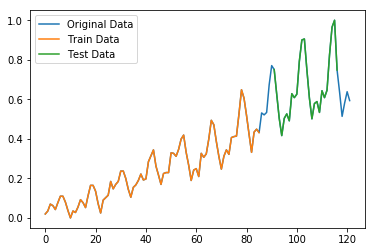

In [39]:
plt.plot(normalized_dataset,label='Original Data')
Xtrain = [X[0] for X in X_train]
Xtrain.extend(X_train[-1][1:])
plt.plot(Xtrain,label='Train Data')
Xtest =list(X_test[0][:4])
Xtest.extend([X[4] for X in X_test])
print(len(Xtest))
y = [Y + len(X)+5 for Y in range(len(Xtest))]
plt.plot(y,Xtest,label='Test Data')
plt.legend()
plt.show()

In [40]:
state_size = 32
n_epochs = 2000
n_timesteps = n_x 
learning_rate = 0.1
n_x_vars = 1
n_y_vars = 1

In [41]:
import tensorflow as tf
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)


In [42]:
tf.reset_default_graph()

In [43]:
X_p = tf.placeholder(tf.float32,[None,n_timesteps,n_x_vars],name='X_p')
Y_p = tf.placeholder(tf.float32,[None,n_timesteps,n_y_vars],name='Y_p')

In [44]:
rnn_inputs = tf.unstack(X_p,axis=1)

In [45]:
os.chdir(os.path.dirname('/home/hackerman/GitHub/NAS_CEPTION/'))


In [46]:

#from cell import BasicLSTMCell

In [47]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn_ops


In [48]:
# comparison cell
# from tensorflow.contrib.rnn import BasicLSTMCell
# cell = BasicLSTMCell(state_size)
# my cell
# from modifiedLSTM import BasicNeatCell
# cell = BasicNeatCell(state_size)
# my cell
from modifiedLSTM import AdvancedNeatCell
with tf.name_scope("cell"):
    cell = AdvancedNeatCell(state_size)

In [49]:
rnn_outputs, _ = tf.nn.static_rnn(cell,rnn_inputs,dtype=tf.float32)

In [50]:
with tf.name_scope("model"):
    W = tf.get_variable('W',[state_size,n_y_vars])
    variable_summaries(W)
    b = tf.get_variable('b',[n_y_vars], initializer=tf.constant_initializer(0.0))
    variable_summaries(b)
predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]
print (predictions[0])

Tensor("add:0", shape=(?, 1), dtype=float32)


In [51]:
y_as_list = tf.unstack(Y_p,num=n_timesteps,axis=1)

In [52]:
with tf.name_scope("mse"):
    mse = tf.losses.mean_squared_error
    # variable_summaries(mse)
with tf.name_scope("loss"):
    losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]
    variable_summaries(losses)

In [53]:
total_loss = tf.reduce_mean(losses)
# tf.summary.scalar(total_loss)

In [54]:
with tf.name_scope("train_step"):
    train_step = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)
    # variable_summaries(train_step)


In [55]:
merged = tf.summary.merge_all()


In [56]:
merged

<tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>

In [74]:
with tf.Session() as tfs:
    train_writer = tf.summary.FileWriter('./train3',
                                      tfs.graph)
    test_writer = tf.summary.FileWriter('./test3',
                                      tfs.graph)
    tfs.run(tf.global_variables_initializer())
    epoch_loss = 0.0
    for epoch in range(n_epochs):
        feed_dict={X_p: X_train.reshape(-1, n_timesteps, 
                                        n_x_vars), 
                   Y_p: Y_train.reshape(-1, n_timesteps, 
                                        n_y_vars)
                  }
        # print (merged)
        epoch_loss,y_train_pred,_,summary = tfs.run([total_loss,predictions,train_step,merged], 
                                            feed_dict=feed_dict)
        train_writer.add_summary(summary, epoch)
        #print("train mse = {}".format(epoch_loss))
        feed_dict={X_p: X_test.reshape(-1, n_timesteps, 
                                        n_x_vars), 
                   Y_p: Y_test.reshape(-1, n_timesteps, 
                                        n_y_vars)
                  }
        test_loss, y_test_pred = tfs.run([total_loss,predictions], 
                                         feed_dict=feed_dict
                                        )
        train_writer.add_summary(summary, epoch)
        #print('test mse = {}'.format(test_loss))
        #print('test rmse = {}'.format(np.sqrt(test_loss)))

In [80]:
y_train_pred

array([[0.15902501],
       [0.16565707],
       [0.1811535 ],
       [0.17782988],
       [0.16897503],
       [0.18447876],
       [0.19890606],
       [0.19890606],
       [0.18558751],
       [0.16676314],
       [0.15019348],
       [0.16565707],
       [0.16234015],
       [0.1745079 ],
       [0.19113398],
       [0.18447876],
       [0.17340094],
       [0.200017  ],
       [0.22338198],
       [0.22338198],
       [0.21002254],
       [0.18226174],
       [0.1612349 ],
       [0.19002435],
       [0.19557418],
       [0.20112813],
       [0.23229916],
       [0.2155864 ],
       [0.2256105 ],
       [0.23229916],
       [0.25574228],
       [0.25574228],
       [0.23899221],
       [0.21447334],
       [0.19668464],
       [0.21892653],
       [0.22449617],
       [0.23452969],
       [0.24903946],
       [0.23564515],
       [0.23787642],
       [0.276989  ],
       [0.29042172],
       [0.30386263],
       [0.26692113],
       [0.24680597],
       [0.2256105 ],
       [0.250

In [78]:
y_train_pred=y_train_pred[0]
y_test_pred=y_test_pred[0]

In [81]:
#invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

#invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

In [84]:
y_train_pred

array([[167.76903],
       [170.42848],
       [176.64256],
       [175.30978],
       [171.75899],
       [177.97598],
       [183.76134],
       [183.76134],
       [178.4206 ],
       [170.87202],
       [164.22758],
       [170.42848],
       [169.09839],
       [173.97766],
       [180.64473],
       [177.97598],
       [173.53378],
       [184.20682],
       [193.57617],
       [193.57617],
       [188.21904],
       [177.08696],
       [168.6552 ],
       [180.19977],
       [182.42525],
       [184.65237],
       [197.15198],
       [190.45015],
       [194.4698 ],
       [197.15198],
       [206.55266],
       [206.55266],
       [199.83588],
       [190.00381],
       [182.87054],
       [191.78954],
       [194.02296],
       [198.04642],
       [203.86482],
       [198.4937 ],
       [199.38844],
       [215.0726 ],
       [220.4591 ],
       [225.84892],
       [211.03537],
       [202.96921],
       [194.4698 ],
       [204.31271],
       [205.20859],
       [205.20859],


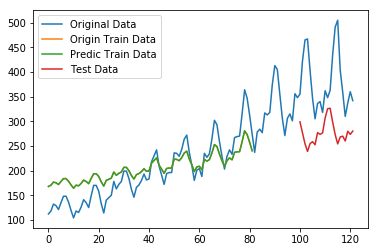

In [110]:
plt.plot(dataset,label='Original Data')
#Xtrain = [if X[4] for X in y_train_pred]
#Xtrain.extend(X_train[-1][1:])
plt.plot(list(range(len(y_train_orig))),y_train_pred,label='Origin Train Data')
plt.plot(list(range(len(y_train_pred))),y_train_pred,label='Predic Train Data')
#Xtest =list(X_test[0][:4])
#Xtest.extend([X[4] for X in y_test_orig])
#print(len(Xtest))
y = [Y + len(X)+14 for Y in range(len(y_test_pred))]
plt.plot(y,y_test_pred,label='Test Data')
plt.legend()
plt.show()

In [61]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_x-1:len(y_train_pred)+n_x-1, :] = y_train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-1:len(dataset)-1, :] = y_test_pred
# plot baseline and predictions
plt.plot(dataset,label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()

ValueError: could not broadcast input array from shape (22,1) into shape (30,1)

In [ ]:
train_writer.close()
test_writer.close()

In [ ]:
x = np.array([[1,2],[3,4],[5,6],[7,8],[9,0],[10,11]])